In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('hotel_bookings.csv')
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
98275,City Hotel,0,8,2016,September,40,25,2,0,2,...,No Deposit,28.0,NaN,0,Transient,95.0,0,0,Check-Out,9/27/2016


In [3]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
## removing company float type

In [7]:
df.drop(["company"],axis=1,inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [8]:
df.shape

(119390, 31)

In [9]:
## removing missing values in categorical datatype

In [10]:
mode1=df['country'].mode().values[0]
mode1

'PRT'

In [11]:
df['country']=df['country'].replace(np.nan,mode1)

In [12]:
df['country'].isnull().sum()

0

In [13]:
# agent missing values removal with median

In [14]:
median1=df['agent'].median()
median1

14.0

In [15]:
df['agent']=df['agent'].replace(np.nan,median1)

In [16]:
df['agent'].isnull().sum()

0

In [17]:
# children missing values removal with mean

In [18]:
mean1=df['children'].mean()
mean1

0.10388990333874994

In [19]:
df['children']=df['children'].replace(np.nan,mean1)

In [20]:
df['children'].isnull().sum()

0

In [21]:
# handling duplicate values

In [22]:
duplicates= df.duplicated()
print(duplicates.sum())
df[duplicates][:5]

32020


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,07-01-2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,07-08-2015


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
dups=df.duplicated()
dups.sum()

0

In [25]:
df.shape

(87370, 31)

In [26]:
## handling or removing outliers

<Axes: >

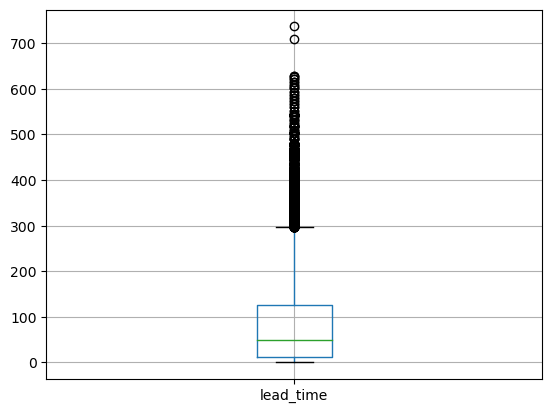

In [27]:
df.boxplot(column=["lead_time"])

In [28]:
def remove_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range, upper_range

In [29]:
lower_lead, upper_lead=remove_outliers(df['lead_time'])

In [30]:
df['lead_time']=np.where(df['lead_time']>upper_lead, upper_lead, df['lead_time'])
df['lead_time']=np.where(df['lead_time']<lower_lead, lower_lead, df['lead_time'])

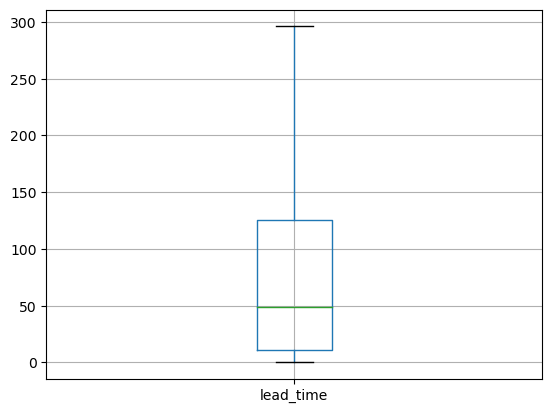

In [31]:
df.boxplot(column=["lead_time"])
plt.show()

In [32]:
df=pd.get_dummies(df,columns=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date'])

In [33]:
df.head(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,13.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14.0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0.0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,9.0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,85.0,2015,27,1,0,3,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,75.0,2015,27,1,0,3,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,23.0,2015,27,1,0,4,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#try same with mpg dataset 